<a href="https://colab.research.google.com/github/amnamalik1993/Sales-Prediction/blob/main/Project_1_Part_5%20and%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 5

# **Preprocesing for Machine Learning**

For Part 5, we will use the original dataset with the goal of preventing data leakage.

 

* Before splitting the data, drop duplicates and fix inconsistencies in categorical data.
* Identify  target (X) and features (y): We will assign the 'Item_Outlet_Sales' as the target and the rest of the relevant variables as the features matrix.
* Perform a train test split 
* Create a pre processing pipeline to prepare the dataset for Machine Learning
* Make sure your imputation of missing values occurs after the train test split using SimpleImputer. 





**Importing**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

**ReLoading Data**

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [5]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv('/content/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Performing Preprocessing Steps**

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
# Inspecting and addressing inconsistencies in categorical data
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [9]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [10]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

After inspecting, 


*   The column Item_Fat_Content has inconsistencies with the spellings. This needs to be addressed  
*   Reg as Regular
*   low fat and LF as Low Fat

*   The column Outlet_Type has three inconsistencies with the spellings. Supermarket has three types. It should be one supermarket
*   Supermarket Type1 should be Supermarket

*   Supermarket Type2 should be Supermarket
*   Supermarket Type3 should be Supermarket








In [11]:
Item_Fat_Content_Map = {'LF':'Low Fat',
                   'low fat':'Low Fat',
                   'reg':'Regular'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(Item_Fat_Content_Map)

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
Outlet_Type_Map = {'Supermarket Type1':'Supermarket Type',
                   'Supermarket Type2':'Supermarket Type',
                   'Supermarket Type3':'Supermarket Type'}

df['Outlet_Type'] = df['Outlet_Type'].replace(Outlet_Type_Map)

In [14]:
df['Outlet_Type'].value_counts()

Supermarket Type    7440
Grocery Store       1083
Name: Outlet_Type, dtype: int64

**Ordinal Encoding**

In [15]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
# Ordinal Encoding 'Outlet_Size'
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix

In [17]:
# Defining X
X = df.drop('Item_Outlet_Sales', axis=1)

# Defining y
y = df['Item_Outlet_Sales']

**Validation Split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Instantiate Column Selectors**

In [19]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [20]:
num_selector(X_train)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size']

**Instantiate Transformers**

In [21]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

**Instantiate Pipelines**

In [22]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [23]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

**Instantiate ColumnTransformer**

In [24]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f785854b4c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f785854b310>)])

**Transformer Data**

In [25]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f785854b4c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f785854b310>)])

In [26]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  1.        ,
         0.        ,  1.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  0.        ,
         0.        ,  1.        ]])

**Inspect the Result**

In [27]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1588)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  1.        ,
         0.        ,  1.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  0.        ,
         0.        ,  1.        ]])

In [28]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

Part 6

## Maching Learning - Training the Models

Imports for Machine Learning

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     2
Item_Outlet_Sales            3493
dtype: int64

In [34]:
# Going to drop the 'Item_Identifier' column due to high cardinality.

df = df.drop(columns = 'Item_Identifier')

In [30]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f785854b4c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f785854b310>)])

Fitting a Linear Regression Model

In [ ]:
## Make and fit model
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

y_hat Predictions

In [38]:
# Get predictions to use to evaluate model
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

Function to Evaluate Model

In [39]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated
  
  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """
  
  r2 = r2_score(y_true,y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  
  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

Linear Regression Model

In [40]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.669
  - RMSE = 989.813

Results for testing data:
  - R^2 = -2.3054399434341525e+20
  - RMSE = 25220341873846.766



## Linear Regression Model Observations

*   The model is performing well on the training set as compared to the testing set
*   This could be because the data is not well suited for Linear Model
*   As we go along, we are going to explore other models to see their performance






Importing Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

Fitting a Decision Tree Regressor/Regression Tree Model

In [ ]:
## Make and fit model
dec_tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state = 42))
dec_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = dec_tree_pipe.predict(X_train)
y_hat_test = dec_tree_pipe.predict(X_test)

Decision Tree Regressor Model

In [43]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 1.0
  - RMSE = 0.0

Results for testing data:
  - R^2 = 0.214
  - RMSE = 1472.942



## Untuned Decision Tree / Regression Model Observations

*   This models performance is on point with the training set. It does not perform well with the tresting set
*   This model is overfitting and will need further tuning.


Creating a Loop to Tune Depth for Decision Tree Regressor Model

In [ ]:
#create a range of max_depth values
depths = range(1, dec_tree_pipe['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

Printing Out Scores from Decision Tree Loop

In [45]:
scores

,Train,Test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582705,0.583937
5,0.604207,0.596056
6,0.615702,0.584668
7,0.629269,0.575691
8,0.641334,0.553091
9,0.653613,0.545267
10,0.666252,0.534726


Plotting Scores for Decision Tree Train & Test Visually

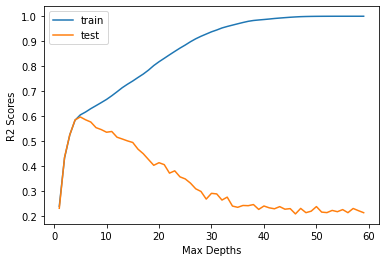

In [48]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

Best Depth for Decision Tree Model

In [49]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

Reevaluating Decision Tree Regressor Model

In [52]:
best_tree = DecisionTreeRegressor(random_state = 42, max_depth=best_depth)

best_tree_pipe = make_pipeline(preprocessor, best_tree)

best_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_tree_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_tree_pipe.predict(X_test), split = 'testing')

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training Scores for High Variance Decision Tree
Results for training data:
  - R^2 = 0.604
  - RMSE = 1082.281



Testing Scores for High Variance Decision Tree
Results for testing data:
  - R^2 = 0.596
  - RMSE = 1055.685



## Tuned (Max Depth) Decision Tree Model



*   Tuning the max depth on the model has made made it perform well on the testing set.
*   One of the drawbacks to tuning the model is that it may perform more poorly on the training set. 
* It can be noted that this model has high bias even after tunning the max depth.  



## **Overall Recommendation**



*   The final recommedation would be the Decision Tree Regressor / Regression Tree model.
*   This model performed well on the testing data after tuning the max depth.

*   It did lead to poor performance of training set after tunning the model. However it showed improved results with the testing data.
*   There was still some bias in the model, but by far it outperformed the linear regression model.



